# Dataset related to research and workflow management

### Following is the representation of columns with description

ProfileID: A unique identifier for each profile.

##### Dates:
Created Date: The date when the profile was created.

Secondary Completed Date: The date when secondary research was completed.

Close Date: The date when the profile was closed.

##### Researcher Information:

Most Recent Unassign Reason: The reason for the most recent unassignment.

Secondary Researcher: The researcher assigned to secondary research.

Researcher Hire Date: The date when the researcher was hired.

Research Group: The group to which the researcher belongs.

##### Performance Metrics:

Time taken to Complete (secs): The time taken to complete the workflow in seconds.

Benchmark Points: Points associated with the profile's benchmark performance.

##### Workflow Details:

Workflow Type: Type of workflow (e.g., "Co VC - New Round," "Inv VC - New Investor").

Workflow Process: Specific process within the workflow (e.g., "Survey," "Check In," "Pend Survey").

Workflow Status: Current status of the workflow (e.g., "Closed," "Pend Survey").

Workflow Priority: Priority level of the workflow (e.g., "Regular," "High").

Workflow Region: Geographical region associated with the workflow (e.g., "South America," "North America," "Asia"). 


In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [14]:
df = pd.read_csv("Data.csv")

In [15]:
# Viewing the 5 no. of random sample Data
df.sample(5)

,Profile,Created Date,Secondary Completed Date,Close Date,Most Recent Unassign Reason,Secondary Researcher,Researcher Hire Date,Research Group,Time taken to Complete (secs),Benchmark Points,Workflow Type,Workflow Process,Workflow Status,Workflow Priority,Workflow Region
6075,ProfileID 15466,8/9/2021 6:33,8/9/2021 6:57,8/9/2021,NaN,Researcher 99,7/22/2019,MUM - VC - QA,1269.0,40.0,Co VC - New Round,Survey,Closed,Regular,South America
13179,ProfileID 2186,4/6/2020 14:44,8/31/2021 8:12,NaN,NaN,Researcher 8,5/9/2016,MUM - PE - CL,3046.0,35.0,Co PE - Regular Company,Check In,Pend Survey,High,North America
21236,ProfileID 29110,6/10/2021 5:56,8/18/2021 12:39,8/28/2021,NaN,Researcher 170,2/18/2019,MUM - INV - SEC,2353.0,37.0,Inv VC - New Investor,Secondary,Closed,NaN,Asia
38304,ProfileID 44472,2/6/2021 9:05,8/23/2021 9:29,NaN,NaN,Researcher 7,10/24/2019,KOL - VC - CL,2218.0,40.0,Co VC - New Round,Check In,Pend Survey,NaN,North America
11103,ProfileID 19992,8/13/2021 6:40,8/13/2021 11:11,NaN,NaN,Researcher 217,9/17/2018,MUM - M&A - NR,511.0,40.0,Co M&A - New Round,Secondary,Pend Survey,NaN,Europe


In [49]:
# Renaming the column names as per convenience
col_names = ["Profile","Created_date", "Secondary_completed_date", "Close_date","Most_recent_unassign_reason","Secondary_researcher","Researcher_hire_date","Research_group","time_taken_to_complete_in_secs","Benchmark_points","Workflow_type","Workflow_process","Workflow_status","Workflow_priority","Workflow_region"]

df.columns = col_names

In [50]:
df.isnull().sum()

Profile                               0
Created_date                          0
Secondary_completed_date              0
Close_date                        25316
Most_recent_unassign_reason       54571
Secondary_researcher                  0
Researcher_hire_date               1216
Research_group                        0
time_taken_to_complete_in_secs      141
Benchmark_points                    141
Workflow_type                         0
Workflow_process                      0
Workflow_status                       0
Workflow_priority                 17387
Workflow_region                     406
dtype: int64

In [52]:
# Checking the no. of rows and columns present in our Data
df.shape

(56931, 15)

In [53]:
df.dtypes

Profile                            object
Created_date                       object
Secondary_completed_date           object
Close_date                         object
Most_recent_unassign_reason        object
Secondary_researcher               object
Researcher_hire_date               object
Research_group                     object
time_taken_to_complete_in_secs    float64
Benchmark_points                  float64
Workflow_type                      object
Workflow_process                   object
Workflow_status                    object
Workflow_priority                  object
Workflow_region                    object
dtype: object

In [19]:
df.describe(include="float64")

,time_taken_to_complete_in_secs,Benchmark_points
count,56790.000000,56790.000000
mean,2041.553196,33.733844
std,4914.404673,16.931242
min,0.000000,0.000000
25%,960.000000,27.000000
50%,1609.000000,30.000000
75%,2447.000000,40.000000
max,614163.000000,631.000000


The provided statistics describe the columns time_taken_to_complete_in_secs and Benchmark_points. Here's an interpretation of each statistic:

count: The number of non-null entries in the dataset for both columns. In this case, there are 56,790 entries.

mean: The average value of the data. For time_taken_to_complete_in_secs, the average completion time is approximately 2041.55 seconds, and for Benchmark_points, the average is about 33.73.

std: The standard deviation measures the amount of variation or dispersion in the dataset. For time_taken_to_complete_in_secs, the standard deviation is approximately 4914.40, and for Benchmark_points, it's about 16.93.

min: The minimum value in the dataset. For time_taken_to_complete_in_secs, the minimum completion time is 0 seconds, and for Benchmark_points, the minimum value is 0.

25% (Q1): The first quartile or the 25th percentile. This is the value below which 25% of the data falls. For time_taken_to_complete_in_secs, 25% of the data has completion times less than or equal to 960 seconds, and for Benchmark_points, 25% of the data has values less than or equal to 27.

50% (Q2): The second quartile or the median. This is the middle value of the dataset. For time_taken_to_complete_in_secs, the median completion time is 1609 seconds, and for Benchmark_points, the median value is 30.

75% (Q3): The third quartile or the 75th percentile. This is the value below which 75% of the data falls. For time_taken_to_complete_in_secs, 75% of the data has completion times less than or equal to 2447 seconds, and for Benchmark_points, 75% of the data has values less than or equal to 40.

max: The maximum value in the dataset. For time_taken_to_complete_in_secs, the maximum completion time is 614163 seconds, and for Benchmark_points, the maximum value is 631.

In [20]:
df.describe(include="object")

,Profile,Created_date,Secondary_completed_date,Close_date,Most_recent_unassign_reason,Secondary_researcher,Researcher_hire_date,Research_group,Workflow_type,Workflow_process,Workflow_status,Workflow_priority,Workflow_region
count,56931,56931,56931,31615,2360,56931,55715,56931,56931,56931,56931,39544,56525
unique,56931,17366,21547,38,20,299,146,54,81,16,7,4,10
top,ProfileID 1,2/6/2021 8:59,8/3/2021 6:15,9/2/2021,Actlog Details Updated,Researcher 92,1/11/2021,MUM - VC - NR,Co VC - Regular Company,Check In,Closed,High,North America
freq,1,654,12,5080,1868,657,7318,8025,12472,24032,31294,24615,27857


In [171]:
# Average completion time and benchmark points for each Research Group

avg_completion_time = df.groupby('Research_group')['time_taken_to_complete_in_secs'].mean().sort_values(ascending=True)
avg_benchmark_points = df.groupby('Research_group')['Benchmark_points'].mean().sort_values(ascending=False)

In [ ]:
print('Average Completion time for each Research Group \n',avg_completion_time, '\n') 
print('\n Average Benchmark points for each Research Group \n',avg_benchmark_points)

In [70]:
# Research groups which took less time than mean time for completion and has more Benchmark points than mean Benchmark Points 
#sorted this data based on higher benchmark points to lower Benchmark points

df[(df['time_taken_to_complete_in_secs'] < df.time_taken_to_complete_in_secs.mean()) & (df['Benchmark_points'] > df.Benchmark_points.mean())].sort_values('Benchmark_points', ascending= False)

,Profile,Created_date,Secondary_completed_date,Close_date,Most_recent_unassign_reason,Secondary_researcher,Researcher_hire_date,Research_group,time_taken_to_complete_in_secs,Benchmark_points,Workflow_type,Workflow_process,Workflow_status,Workflow_priority,Workflow_region
13967,ProfileID 22569,5/8/2021 16:37,8/6/2021 0:25,8/14/2021,NaN,Researcher 169,11/7/2017,KOL - INV - SEC,1686.0,282.0,Inv VC - Regular Investor,Check In,Closed,High,North America
41901,ProfileID 4771,5/8/2021 16:37,8/6/2021 1:02,8/14/2021,NaN,Researcher 172,4/10/2018,KOL - INV - SEC,1600.0,238.0,Inv VC - Regular Investor,Check In,Closed,High,North America
23313,ProfileID 30980,5/8/2021 16:37,8/5/2021 11:29,8/14/2021,NaN,Researcher 67,7/22/2019,MUM - INV - SEC,1697.0,123.0,Inv PE - Regular Investor,Check In,Closed,High,North America
14669,ProfileID 2320,8/29/2020 16:36,8/16/2021 3:29,8/28/2021,NaN,Researcher 60,4/22/2019,MUM - INV - SEC,1999.0,123.0,Inv VC - Regular Investor,Check In,Closed,Regular,North America
34277,ProfileID 40848,5/29/2021 16:37,8/4/2021 13:36,8/14/2021,NaN,Researcher 170,2/18/2019,MUM - INV - SEC,1585.0,114.0,Inv VC - Regular Investor,Check In,Closed,High,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37921,ProfileID 44127,11/28/2020 8:55,8/20/2021 6:36,8/28/2021,NaN,Researcher 33,1/6/2020,MUM - VC - NR,1739.0,34.0,Co VC - Regular Company,Check In,Closed,NaN,North America
28206,ProfileID 35384,2/6/2021 9:04,8/19/2021 6:36,NaN,NaN,Researcher 66,10/24/2019,KOL - VC - CL,1373.0,34.0,Co VC - Regular Company,Check In,Pend Survey,NaN,North America
21424,ProfileID 29280,2/20/2021 8:53,8/17/2021 11:30,NaN,NaN,Researcher 177,1/11/2021,MUM - VC - NR,1802.0,34.0,Co VC - Regular Company,Check In,Pend Survey,NaN,Europe
12626,ProfileID 21361,3/6/2021 8:58,8/30/2021 13:16,NaN,NaN,Researcher 140,1/6/2020,MUM - VC - NR,1721.0,34.0,Co VC - Regular Company,Secondary,Pend Survey,NaN,North America


In [86]:
# Distribution of Workflow statuses

work_status = df.Workflow_status.value_counts()
work_status

Closed             31294
Pend Survey        15570
Pend Primary        7524
Pend QA             2297
Pend Correction      162
Pend Deletion         83
Pend Secondary         1
Name: Workflow_status, dtype: int64

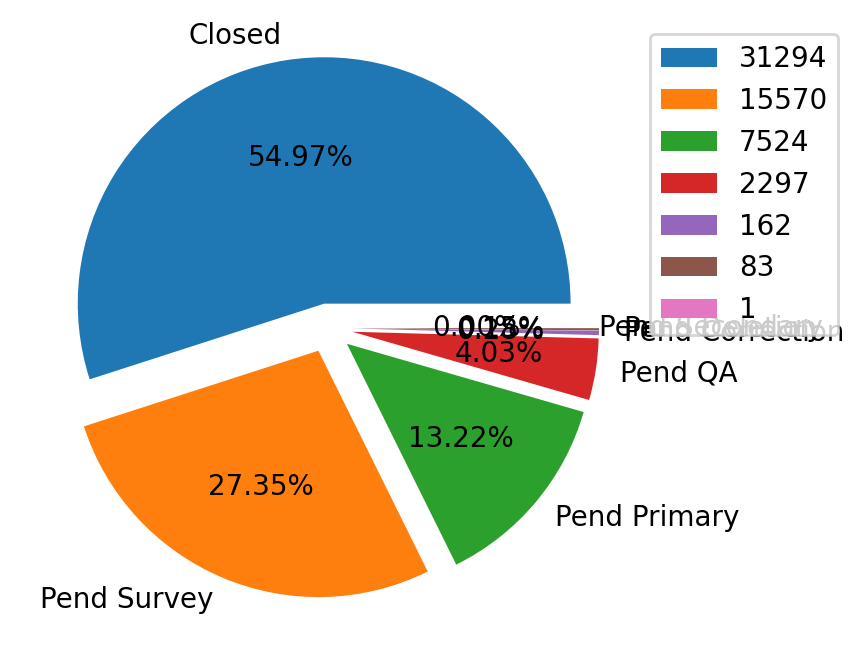

In [182]:
plt.figure(figsize=(4,4), dpi = 200)
plt.pie(work_status, explode=[0.1,0.1,0.1,0.1,0.1,0.1,0], autopct='%.2f%%' , labels=work_status.index)
plt.legend(work_status, bbox_to_anchor=(1,1))

The pie chart above illustrates that the most frequent workflow status is "Closed," followed by "Pend Survey."

In [189]:
# How many unique values present in respective columns

df.nunique()

Profile                           56931
Secondary_completed_date          21547
Close_date                           38
Most_recent_unassign_reason          20
Secondary_researcher                299
Researcher_hire_date                146
Research_group                       54
time_taken_to_complete_in_secs     6632
Benchmark_points                    184
Workflow_type                        81
Workflow_process                     16
Workflow_status                       7
Workflow_priority                     4
Workflow_region                      10
dtype: int64

In [190]:
# Exploring workflow statuses

df["Workflow_status"].unique()

array(['Pend QA', 'Closed', 'Pend Survey', 'Pend Primary',
       'Pend Deletion', 'Pend Correction', 'Pend Secondary'], dtype=object)

In [192]:
# Data where workflow status is "Closed"

df[df["Workflow_status"].isin(["Closed"])]

,Profile,Secondary_completed_date,Close_date,Most_recent_unassign_reason,Secondary_researcher,Researcher_hire_date,Research_group,time_taken_to_complete_in_secs,Benchmark_points,Workflow_type,Workflow_process,Workflow_status,Workflow_priority,Workflow_region
Created_date,,,,,,,,,,,,,,
2021-03-06 08:27:00,ProfileID 10,2021-08-03 07:25:00,2021-08-05,NaN,Researcher 10,11/4/2019,MUM - M&A - NC,557.0,10.0,Co M&A - Exit Check-in,Check In,Closed,Regular,Europe
2020-11-07 07:58:00,ProfileID 100,2021-08-09 10:27:00,2021-08-21,NaN,Researcher 84,7/12/2018,MUM - F - SEC,943.0,10.0,Fund PE - Regular Fund,Check In,Closed,High,North America
2021-08-03 05:24:00,ProfileID 10000,2021-08-03 07:27:00,2021-08-27,NaN,Researcher 164,1/11/2021,MUM - D - NC/NR,3477.0,47.0,Co Debt - New Company,Secondary,Closed,NaN,Europe
2021-08-02 11:14:00,ProfileID 10001,2021-08-03 02:44:00,2021-08-09,NaN,Researcher 139,5/2/2017,MUM - IPO - NR,1927.0,20.0,Co Public - New Round,Secondary,Closed,NaN,North America
2021-08-12 08:25:00,ProfileID 10002,2021-08-13 08:10:00,2021-08-13,NaN,Researcher 45,3/2/2020,MUM - PF (4),730.0,30.0,Co VC - New Round,Fight Club,Closed,Regular,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-04 05:14:00,ProfileID 9993,2021-08-05 04:28:00,2021-08-09,NaN,Researcher 28,12/9/2019,MUM - PC - ALL - Swing,1219.0,20.0,Co Private - Regular Company,Special Request,Closed,High,Middle East
2021-08-04 07:08:00,ProfileID 9996,2021-08-04 08:42:00,2021-08-04,NaN,Researcher 25,4/12/2021,MUM - PF (2),1856.0,0.0,Co PF - New Company,Secondary,Closed,NaN,Europe
2021-08-03 09:53:00,ProfileID 9997,2021-08-03 11:24:00,2021-08-27,NaN,Researcher 187,1/11/2021,MUM - M&A - IC/ECI,4450.0,89.0,Co M&A - New Company,News,Closed,High,Europe


In [178]:
df.groupby("Workflow_region").mean(["time_taken_to_complete_in_secs","Benchmark_points"]).sort_values("time_taken_to_complete_in_secs",ascending=False)

,time_taken_to_complete_in_secs,Benchmark_points
Workflow_region,,
Greater China,2627.797912,40.932432
Asia,2441.942380,36.690899
South America,2220.055283,37.533170
Australia/Pacific,2163.941318,36.287157
India,2145.501843,35.713825
Middle East,2133.974576,35.203390
Israel,2091.585734,33.883402
Africa,2054.940499,35.241843
North America,2032.092289,33.119670


The above provided data appears to show the average time taken to complete workflows (in seconds) and average Benchmark Points for different workflow regions.
This summary provides insights into the average performance metrics for workflows in different regions. It appears that Greater China has the highest average time taken to complete workflows, while Europe has the lowest. The average Benchmark Points follow a similar pattern, with Greater China having the highest average and Europe having a slightly lower average. Same is represented in below Bar Chart

<Axes: xlabel='Workflow_region'>

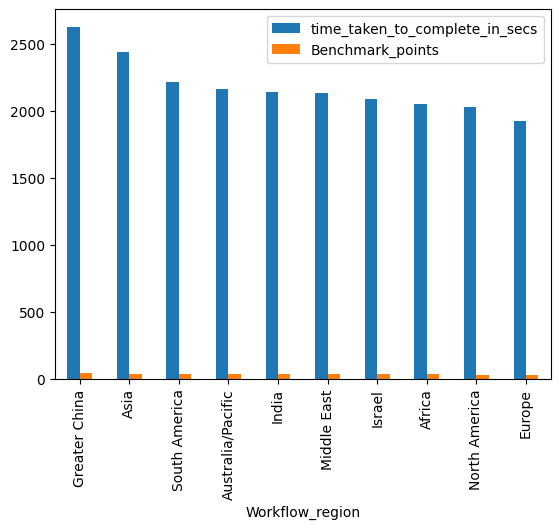

In [185]:
df.groupby("Workflow_region").mean(["time_taken_to_complete_in_secs","Benchmark_points"]).sort_values("time_taken_to_complete_in_secs",ascending=False).plot(kind="bar")

In [144]:
# Evaluating the effectiveness of research groups that completed workflow processes in less time than the average 
# and achieved benchmark points higher than the average

df[(df.Benchmark_points > df.Benchmark_points.mean()) & df.time_taken_to_complete_in_secs < df.time_taken_to_complete_in_secs.mean()]

,Profile,Created_date,Secondary_completed_date,Close_date,Most_recent_unassign_reason,Secondary_researcher,Researcher_hire_date,Research_group,time_taken_to_complete_in_secs,Benchmark_points,Workflow_type,Workflow_process,Workflow_status,Workflow_priority,Workflow_region
0,ProfileID 1,8/31/2021 12:46,8/31/2021 16:19,NaN,NaN,Researcher 1,4/6/2021,SEA - VC - NC/NR - Bronze Shell Swing,2455.0,57.0,Co VC - New Company,Post News,Pend QA,NaN,Greater China
1,ProfileID 10,3/6/2021 8:27,8/3/2021 7:25,8/5/2021,NaN,Researcher 10,11/4/2019,MUM - M&A - NC,557.0,10.0,Co M&A - Exit Check-in,Check In,Closed,Regular,Europe
2,ProfileID 100,11/7/2020 7:58,8/9/2021 10:27,8/21/2021,NaN,Researcher 84,7/12/2018,MUM - F - SEC,943.0,10.0,Fund PE - Regular Fund,Check In,Closed,High,North America
3,ProfileID 1000,8/10/2021 8:44,8/10/2021 9:18,NaN,NaN,Researcher 18,8/1/2016,KOL - VC - NR,1908.0,45.0,Co VC - New Round,News,Pend Survey,High,North America
4,ProfileID 10000,8/3/2021 5:24,8/3/2021 7:27,8/27/2021,NaN,Researcher 164,1/11/2021,MUM - D - NC/NR,3477.0,47.0,Co Debt - New Company,Secondary,Closed,NaN,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56926,ProfileID 9995,4/6/2020 14:38,8/12/2021 4:51,NaN,NaN,Researcher 208,1/11/2021,MUM - PE - CL,2074.0,30.0,Co PE - Regular Company,Check In,Pend Survey,High,North America
56927,ProfileID 9996,8/4/2021 7:08,8/4/2021 8:42,8/4/2021,NaN,Researcher 25,4/12/2021,MUM - PF (2),1856.0,0.0,Co PF - New Company,Secondary,Closed,NaN,Europe
56928,ProfileID 9997,8/3/2021 9:53,8/3/2021 11:24,8/27/2021,NaN,Researcher 187,1/11/2021,MUM - M&A - IC/ECI,4450.0,89.0,Co M&A - New Company,News,Closed,High,Europe
56929,ProfileID 9998,8/2/2021 4:58,8/3/2021 9:50,8/27/2021,NaN,Researcher 198,1/11/2021,MUM - M&A - NC,2155.0,42.0,Co M&A - New Company,Secondary,Closed,NaN,Europe


In [145]:
# Exploring various reasons for Unassignment

df.Most_recent_unassign_reason.unique()

array([nan, 'Actlog Details Updated', 'Incorrect Workflow',
       'Actlog not understood.', 'No updated found on upcoming round.',
       'wrong ipo company for level 5 training session', 'Dupe entity',
       'Workflow is Broken - Automatically unassigned',
       'wrong company for level 6', 'Scrubbed in May', 'Time off',
       'To be discussed', 'Project work',
       'Need to use workflow tool, will get back soon.',
       'Out of vc scope', 'wrong process',
       'Started work on RM project, hence put in PM 17',
       'Someone else is going to work',
       "Haven't been level 7 to do IPO round.", 'EOD',
       "haven't been level 7 to do IPO"], dtype=object)

In [153]:
# Changing the data type of columns having date as a value, As default data type is string 

df['Created_date'] = pd.to_datetime(df['Created_date'])
df['Secondary_completed_date'] = pd.to_datetime(df['Secondary_completed_date'])
df['Close_date'] = pd.to_datetime(df['Close_date'])

In [163]:
# Setting the index as Created_date
df.set_index('Created_date', inplace=True)

# Resample for daily frequency
daily_data = df.resample(rule='D').size()

# Resample for monthly frequency
monthly_data = df.resample(rule='M').size()

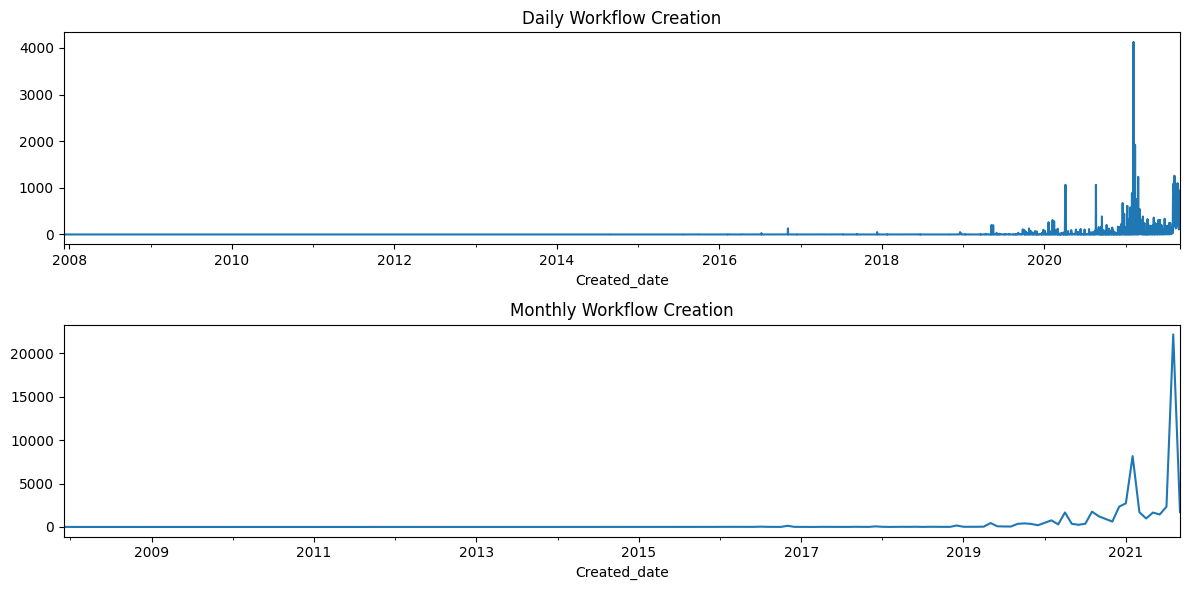

<Figure size 640x480 with 0 Axes>

In [183]:
plt.figure(figsize=(12, 6))

# Plot daily data
plt.subplot(2, 1, 1)
daily_data.plot(title='Daily Workflow Creation')

# Plot monthly data
plt.subplot(2, 1, 2)
monthly_data.plot(title='Monthly Workflow Creation')

plt.tight_layout()
plt.show()
plt.savefig("Daily_Monthly_Workflow")

In [159]:
df.reset_index(inplace=True)

In [169]:
Report = ProfileReport(df)

In [170]:
Report.to_notebook_iframe
Report.to_file("Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Manoj Gaikwad\AppData\Local\Programs\Python\Python39\lib\site-packages\ydata_profiling\model\pandas\correlations_pandas.py:84: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  return _cramers_corrected_stat(pd.crosstab(col_1, col_2), correction=True)
C:\Users\Manoj Gaikwad\AppData\Local\Programs\Python\Python39\lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'cannot reindex on an axis with duplicate labels')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]